In [1]:
%cd ../


e:\python\atomization-energy-regression


In [2]:
from src.data_processing.dataset.qm7 import get_molecule_name 
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data = scipy.io.loadmat('dataset\qm7.mat')
X = data['X'] # Coulomb matrices -> 7165 x 23 x 23
T = data['T'].T.squeeze() # atomization energies Y -> 7165 x 1
Z = data['Z'] # atomic charge -> 7165 x 23
R = data['R'] # cartesian coordinates -> 7165 x 23 x 3
data_train, data_test = {}, {}
molecule_names = get_molecule_name(data)

print(Z[0], molecule_names[0])

[6. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] CH4X18


In [47]:
T.shape

(7165,)

In [26]:
mols_infor = {}
for (idx, (atomic_charge, coor, mol_name, ener)) in enumerate(zip(Z, R, molecule_names, T)):
    if mol_name not in mols_infor:
        mols_infor[mol_name] = []
    
    mols_infor[mol_name].append(str(atomic_charge))

In [35]:
mol_counts = {}
for mol in mols_infor:
    mol_counts[mol] = len(mols_infor[mol])

In [46]:
# find max mol_count
max_mol_count = 0
mol_name
for mol in mol_counts:
    if mol_counts[mol] > max_mol_count:
        max_mol_count = mol_counts[mol]
        mol_name = mol
print(max_mol_count, mol)

112 C6NH3X13


In [45]:
counters = {}
for mol in mol_counts:
    # if mol_counts[mol] == 1: continue
    if mol_counts[mol] not in counters:
        counters[mol_counts[mol]] = 0
    counters[mol_counts[mol]] += 1

counters.describe()

AttributeError: 'builtin_function_or_method' object has no attribute 'describe'

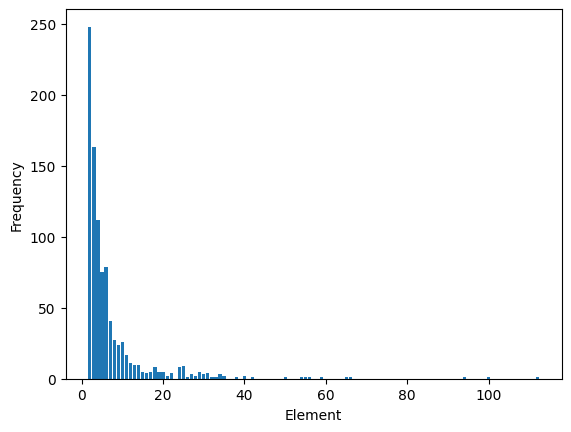

In [43]:
import matplotlib.pyplot as plt

# create a bar chart with the frequency of each element
plt.bar(counters.keys(), counters.values())

# set the labels for the x and y axes
plt.xlabel('Element')
plt.ylabel('Frequency')

# display the plot
plt.show()

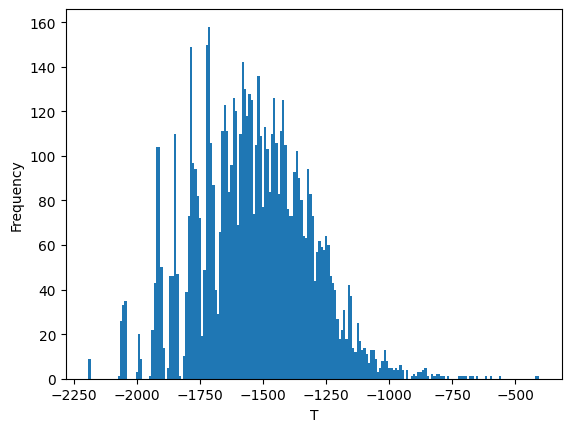

In [50]:
# create a histogram with 50 bins
plt.hist(T, bins=200)

# set the labels for the x and y axes
plt.xlabel('atomization energies')
plt.ylabel('Frequency')

# display the plot
plt.show()